<a href="https://colab.research.google.com/github/doaa450/Churn-prediction/blob/main/CLTV_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Table of Contents


            *   Business Objective
            *   Data Wrangling
            *   Data Preprocess
            *   Data Analysis
            *   RFM Analysis
            




#Business Objective


The Customer Lifetime Value (CLTV) metric represents the total amount of money a customer is expected to spend in a business during his lifetime and it is a valuable tool for the marketing department to identify high-potential customers .By calculating the CLTV for each customer, we can understand their behavior and segment them accordingly. This enables us to tailor our offerings to each customer based on their value to the company.

#Data Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel('/content/Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.shape

(541909, 8)

In [6]:
df['InvoiceDate'].min(),df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

inconsistant & unneeded feature

In [7]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [8]:
df['InvoiceDate'].max()

Timestamp('2011-11-30 17:42:00')

In [9]:
df = df.drop(['StockCode'], axis=1)

#Data Preprocess

Missing Values

In [10]:
# Check for null values in each column
null_values = df.isnull().sum()
# Display columns with null values and their counts
print("Columns with Null Values:")
print(null_values[null_values > 0])

Columns with Null Values:
Description      1439
CustomerID     127216
dtype: int64


In [11]:
# Drop rows with null values
df = df.dropna()


In [12]:
df.isnull().sum()

InvoiceNo      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Duplicates

In [13]:
# Check the number of duplicated values
df.duplicated().sum().sum()

4982

In [14]:
# Let's get the duplicated rows
duplicates = df[df.duplicated()]

In [15]:
duplicates[:10]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
587,536412,FELTCRAFT DOLL MOLLY,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
589,536412,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,2010-12-01 11:49:00,3.75,17920.0,United Kingdom
594,536412,CHRISTMAS CRAFT TREE TOP ANGEL,1,2010-12-01 11:49:00,2.10,17920.0,United Kingdom
598,536412,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
600,536412,FELTCRAFT CUSHION BUTTERFLY,2,2010-12-01 11:49:00,3.75,17920.0,United Kingdom


In [16]:
df['Sales']=df['Quantity']*df['UnitPrice']

# Data Analysis

Univariate Analysis

In [17]:
df[['Quantity', 'UnitPrice','Sales']].describe(percentiles=[.99])

,Quantity,UnitPrice,Sales
count,389168.000000,389168.000000,389168.000000
mean,12.084889,3.488779,20.447620
std,175.692602,70.796324,212.121123
min,-74215.000000,0.000000,-77183.600000
50%,5.000000,1.950000,11.400000
99%,120.000000,15.000000,200.000000
max,74215.000000,38970.000000,77183.600000


In [18]:
df['InvoiceNo'].nunique()

21269

In [19]:
df['CustomerID'].nunique()

4331

In [20]:
df['Description']=df['Description'].str.lower()

In [21]:
df['Description']=df['Description'].str.strip()

In [22]:
df['Description'].nunique()

3876

In [23]:
df['Description'].value_counts()

Description
white hanging heart t-light holder     2017
regency cakestand 3 tier               1853
jumbo bag red retrospot                1616
party bunting                          1398
assorted colour bird ornament          1376
                                       ... 
woolly hat sock glove advent string       1
fire polished glass bracelet red          1
fire polished glass bracelet montan       1
baking mould toffee cup  chocolate        1
silver and black orbit necklace           1
Name: count, Length: 3876, dtype: int64

In [24]:
df['Country'].value_counts()

Country
United Kingdom          345801
Germany                   9155
France                    8152
EIRE                      7165
Spain                     2462
Netherlands               2285
Belgium                   1971
Switzerland               1877
Portugal                  1378
Australia                 1259
Norway                    1013
Italy                      795
Channel Islands            752
Finland                    681
Cyprus                     618
Sweden                     460
Austria                    394
Denmark                    378
Japan                      350
Poland                     341
Israel                     250
USA                        248
Unspecified                244
Singapore                  229
Iceland                    171
Canada                     151
Malta                      122
Greece                     110
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [25]:
df['Country'].nunique()

37

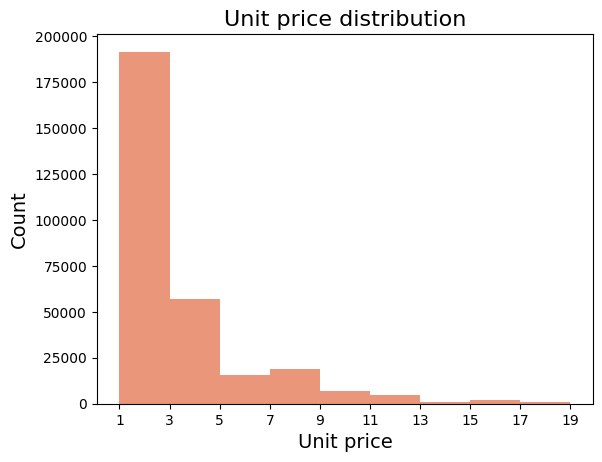

In [26]:
bins = np.arange(1, 21, 2)
ticks = np.arange(1, 21, 2)
plt.hist(data=df, x='UnitPrice', bins=bins, color='darksalmon')
plt.xticks(ticks, ticks)
plt.xlabel('Unit price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Unit price distribution', fontsize=16);

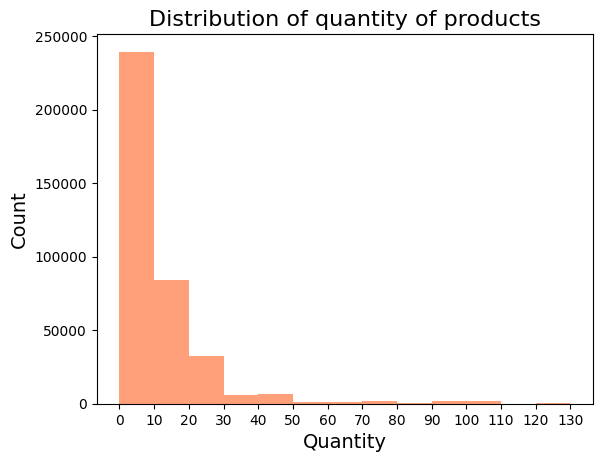

In [27]:
bins = np.arange(0, 140, 10)
ticks = np.arange(0, 140, 10)
plt.hist(data=df, x='Quantity', bins=bins, color='lightsalmon')
plt.xticks(ticks, ticks)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of quantity of products', fontsize=16);


In [28]:
#Date Time Analysis
df["Month"] = df.InvoiceDate.dt.month
df["Year"] = df.InvoiceDate.dt.year
df["Day"] = df.InvoiceDate.dt.day
df["Quarter"] = df.InvoiceDate.dt.quarter
df["Day of Week"] = df.InvoiceDate.dt.dayofweek

In [29]:
#Mapping day of week
dayofweek_mapping = dict({0: "Monday",
                         1: "Tuesday",
                         2: "Wednesday" ,
                         3: "Thursday",
                         4: "Friday",
                         5: "Saturday",
                         6: "Sunday"})

In [30]:
df["Day of Week"] = df["Day of Week"].map(dayofweek_mapping)

Bi-variate Analysis

<Axes: xlabel='Month'>

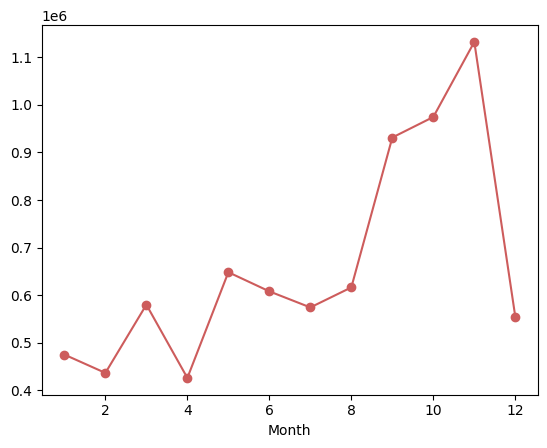

In [31]:
df.groupby('Month')['Sales'].sum().plot(marker='o', linestyle='-',color='indianred')

<Axes: xlabel='Day of Week'>

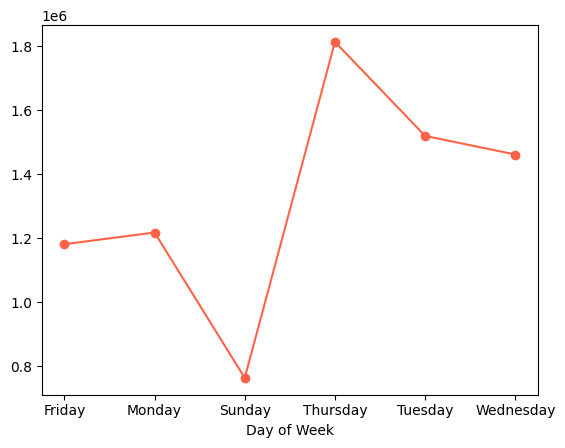

In [32]:
df.groupby('Day of Week')['Sales'].sum().plot(marker='o', linestyle='-',color='tomato')

<Axes: xlabel='Quarter'>

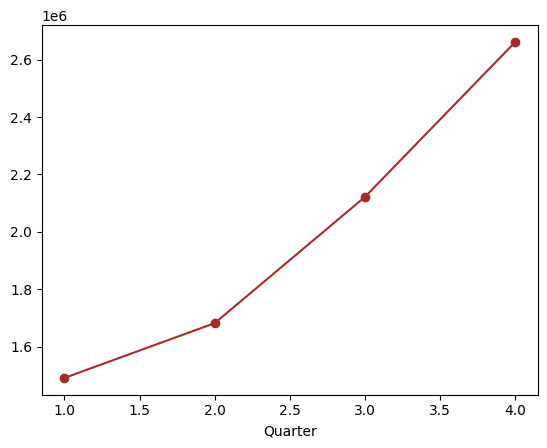

In [33]:
df.groupby('Quarter')['Sales'].sum().plot(marker='o', linestyle='-',color='brown')

<Axes: xlabel='Day'>

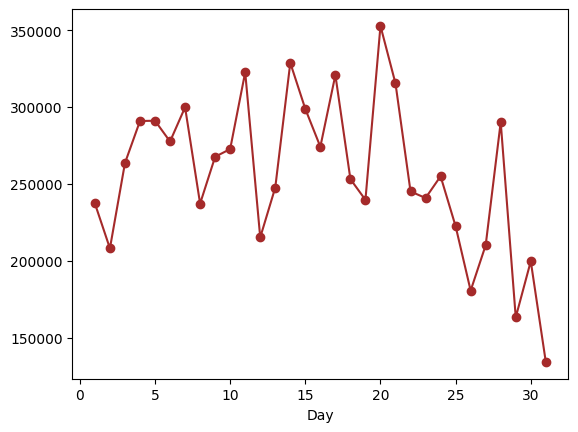

In [34]:
df.groupby('Day')['Sales'].sum().plot(marker='o', linestyle='-',color='brown')

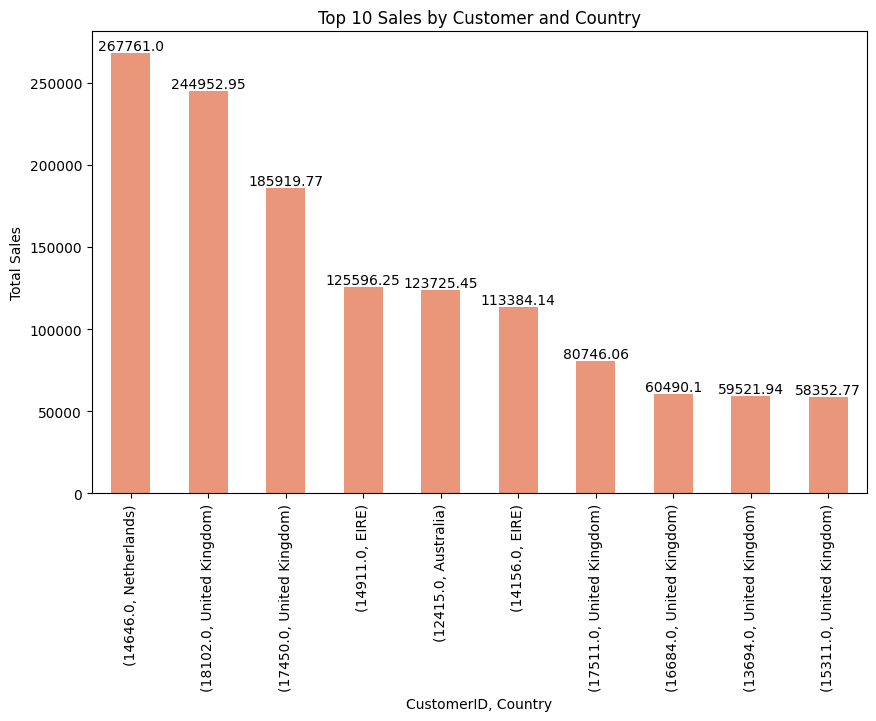

In [35]:
# Assuming df is your DataFrame
top_sales_data = df.groupby(['CustomerID', 'Country'])['Sales'].sum().sort_values(ascending=False).head(10)

# Plotting
ax = top_sales_data.plot(kind='bar', color='darksalmon', figsize=(10, 6))
plt.title('Top 10 Sales by Customer and Country')
plt.xlabel('CustomerID, Country')
plt.ylabel('Total Sales')

# Displaying sales values on top of each bar
for idx, value in enumerate(top_sales_data):
    ax.text(idx, value + 0.5, str(round(value, 2)), ha='center', va='bottom', rotation=0)

plt.show()


<Axes: xlabel='CustomerID,Country'>

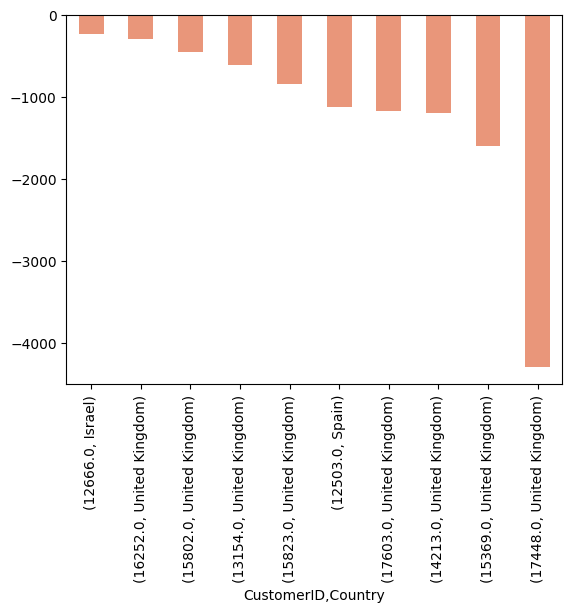

In [36]:
df.groupby(['CustomerID', 'Country'])['Sales'].sum().sort_values(ascending=False).tail(10).plot(kind='bar',color='darksalmon')

<Axes: xlabel='Description'>

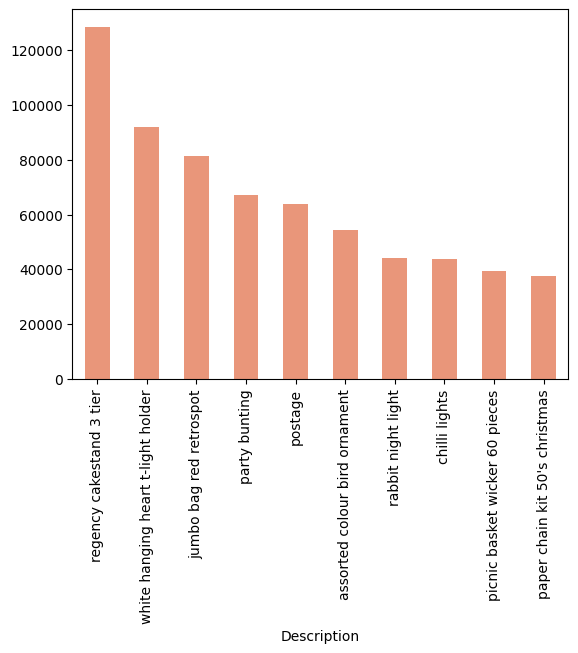

In [37]:
df.groupby(['Description'])['Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='darksalmon')

<Axes: xlabel='Description'>

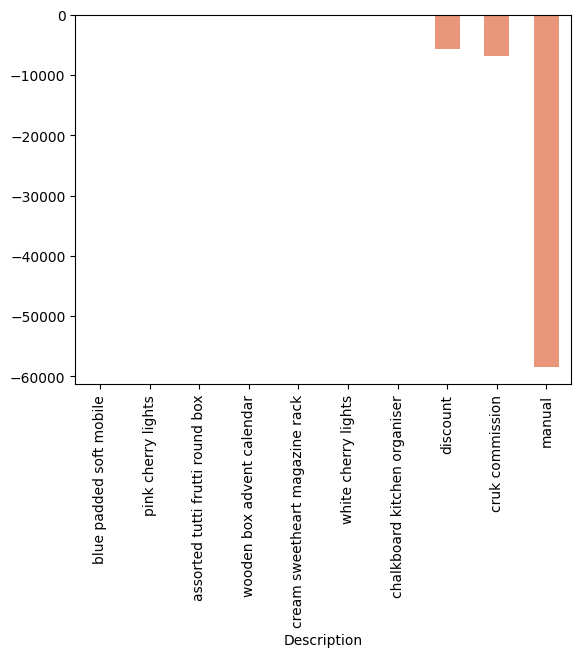

In [38]:
df.groupby(['Description'])['Sales'].sum().sort_values(ascending=False).tail(10).plot(kind='bar',color='darksalmon')

<Axes: xlabel='Description'>

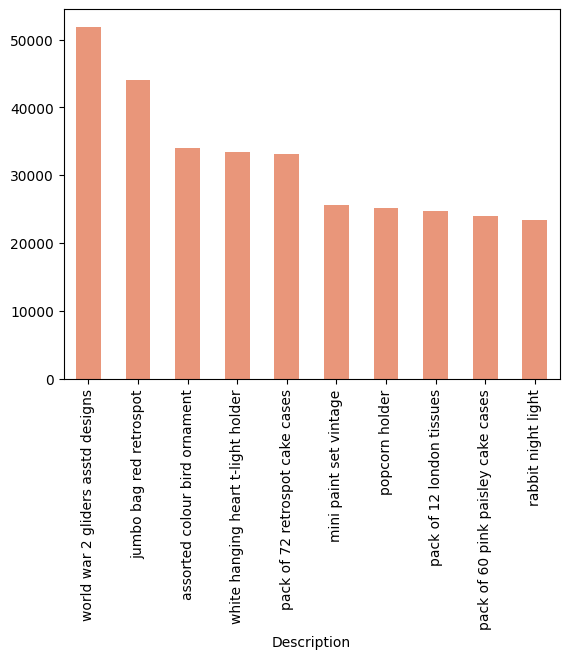

In [39]:
df.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='darksalmon')

<Axes: xlabel='Description'>

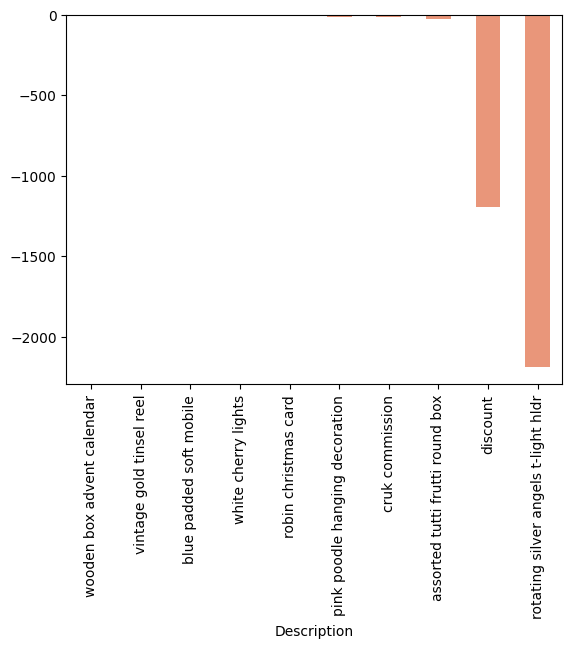

In [40]:
df.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False).tail(10).plot(kind='bar',color='darksalmon')

<Axes: xlabel='Description'>

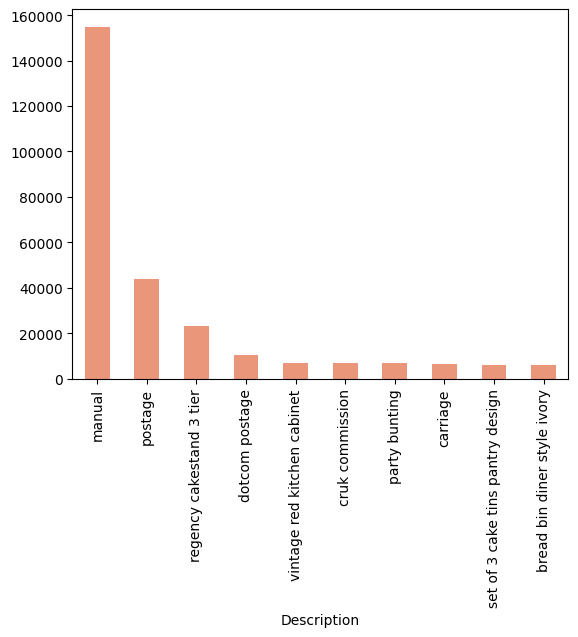

In [41]:
df.groupby(['Description'])['UnitPrice'].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='darksalmon')

In [42]:
df[df['UnitPrice']==df['UnitPrice'].max()]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month,Year,Day,Quarter,Day of Week
222681,C556445,manual,-1,2011-06-10 15:31:00,38970.0,15098.0,United Kingdom,-38970.0,6,2011,10,2,Friday


In [43]:
df[df['CustomerID']==15098.0]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month,Year,Day,Quarter,Day of Week
222670,556442,picnic basket wicker small,60,2011-06-10 15:22:00,4.95,15098.0,United Kingdom,297.0,6,2011,10,2,Friday
222680,556444,picnic basket wicker 60 pieces,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.0,6,2011,10,2,Friday
222681,C556445,manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.0,6,2011,10,2,Friday
222682,556446,picnic basket wicker 60 pieces,1,2011-06-10 15:33:00,649.50,15098.0,United Kingdom,649.5,6,2011,10,2,Friday
222692,C556448,picnic basket wicker small,-60,2011-06-10 15:39:00,4.95,15098.0,United Kingdom,-297.0,6,2011,10,2,Friday


<Axes: xlabel='Description'>

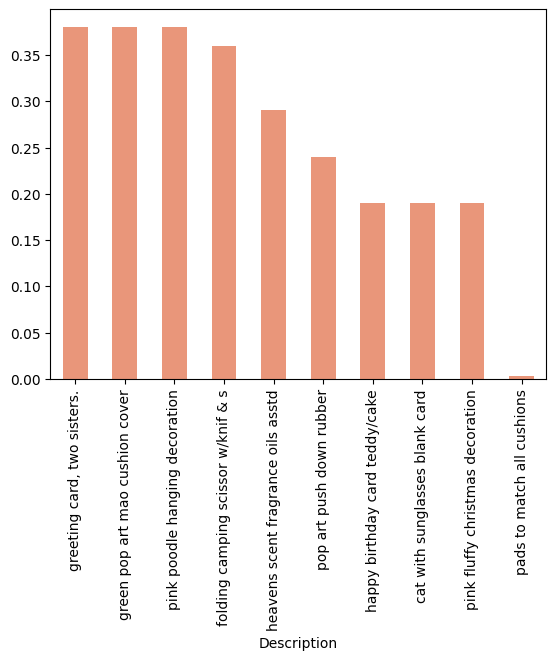

In [44]:
df.groupby(['Description'])['UnitPrice'].sum().sort_values(ascending=False).tail(10).plot(kind='bar',color='darksalmon')

In [45]:
df.groupby(['Country']).agg({'Quantity': 'sum', 'Sales': 'sum'}).reset_index().sort_values(by='Sales',ascending=False)

,Country,Quantity,Sales
35,United Kingdom,3830949,6469952.924
23,Netherlands,192170,272933.520
10,EIRE,132384,243308.850
14,Germany,113515,213893.510
13,France,106217,189664.010
0,Australia,83653,137077.270
32,Switzerland,29778,55739.400
30,Spain,26568,54503.150
3,Belgium,22055,39501.530
31,Sweden,35637,36595.910


In [46]:
df[df['CustomerID']==12346.0]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month,Year,Day,Quarter,Day of Week
61619,541431,medium ceramic top storage jar,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,1,2011,18,1,Tuesday
61624,C541433,medium ceramic top storage jar,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6,1,2011,18,1,Tuesday


In [47]:
df[df['UnitPrice'] == df['UnitPrice'].max()]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month,Year,Day,Quarter,Day of Week
222681,C556445,manual,-1,2011-06-10 15:31:00,38970.0,15098.0,United Kingdom,-38970.0,6,2011,10,2,Friday


In [48]:
df[df['CustomerID'] ==15098.0]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month,Year,Day,Quarter,Day of Week
222670,556442,picnic basket wicker small,60,2011-06-10 15:22:00,4.95,15098.0,United Kingdom,297.0,6,2011,10,2,Friday
222680,556444,picnic basket wicker 60 pieces,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.0,6,2011,10,2,Friday
222681,C556445,manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.0,6,2011,10,2,Friday
222682,556446,picnic basket wicker 60 pieces,1,2011-06-10 15:33:00,649.50,15098.0,United Kingdom,649.5,6,2011,10,2,Friday
222692,C556448,picnic basket wicker small,-60,2011-06-10 15:39:00,4.95,15098.0,United Kingdom,-297.0,6,2011,10,2,Friday


#Features Engineering

# Feature Selection


#XGboost
Step_1: Subet a cohort

Step_2 : Temporal Spliiting

step _3 : RFM features

Step_4: 2 Prediction models

Addational:
        
           . united kingdom

           . calulate cltv from datacamp

In [49]:
df=df[df['Country']=='United Kingdom']

In [50]:
df['Country'].value_counts()

Country
United Kingdom    345801
Name: count, dtype: int64

In [51]:
df['CustomerID'].nunique()

3916

In [52]:
df=df.drop(['Country'],axis=1)

In [53]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

A **cohort** is a group of customers that all at the same time

In [54]:
df_first_purchase=df.sort_values(['CustomerID','InvoiceDate']).groupby('CustomerID').first()

In [55]:
df_first_purchase.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Sales,Month,Year,Day,Quarter,Day of Week
CustomerID,,,,,,,,,,,
12346.0,541431,medium ceramic top storage jar,74215,2011-01-18 10:01:00,1.04,77183.60,1,2011,18,1,Tuesday
12747.0,537215,green juicy fruit photo frame,12,2010-12-05 15:38:00,2.55,30.60,12,2010,5,4,Sunday
12748.0,536521,cream sweetheart egg holder,1,2010-12-01 12:48:00,4.95,4.95,12,2010,1,4,Wednesday
12749.0,552694,family photo frame cornice,2,2011-05-10 15:25:00,9.95,19.90,5,2011,10,2,Tuesday
12820.0,541283,pack of 60 pink paisley cake cases,24,2011-01-17 12:34:00,0.55,13.20,1,2011,17,1,Monday


In [56]:
len(df_first_purchase)

3916

In [57]:
df_first_purchase['InvoiceDate'].min(),df_first_purchase['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-11-30 14:52:00'))

In [58]:
df_first_purchase=df_first_purchase[df_first_purchase['InvoiceDate']<'2011-03-01']
#03

In [59]:
df_first_purchase['InvoiceDate'].min(),df_first_purchase['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-02-28 17:01:00'))

In [60]:
df_first_purchase=df_first_purchase.reset_index()

In [61]:
len(df_first_purchase)

1572

In [62]:
ids=df_first_purchase['CustomerID']

In [63]:
cohort_df=df[df['CustomerID'].isin(ids)]

In [64]:
len(cohort_df)

217984

In [65]:
cohort_df['CustomerID'].nunique()

1572

In [66]:
len(df)

345801

In [67]:
cohort_df['InvoiceDate'].min(),cohort_df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-11-30 17:42:00'))

Step_2: Temporal Spliting

In [68]:
Training_df=cohort_df[cohort_df['InvoiceDate']<'2011-09-01']
#09

In [69]:
Test_df=cohort_df[cohort_df['InvoiceDate']>'2011-09-01']


In [70]:
Training_df['InvoiceDate'].min(),Training_df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-08-31 17:45:00'))

In [71]:
Test_df['InvoiceDate'].min(),Test_df['InvoiceDate'].max()

(Timestamp('2011-09-01 08:25:00'), Timestamp('2011-11-30 17:42:00'))

In [72]:
Training_df['CustomerID'].nunique(),Test_df['CustomerID'].nunique()

(1572, 992)

use future information todeveop targets:
- Amount spent in next 90 Days
- spend flag (True / False)

In [73]:
df.columns

Index(['InvoiceNo', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Sales', 'Month', 'Year', 'Day', 'Quarter',
       'Day of Week'],
      dtype='object')

Step 3 : RFM features

In [74]:
import datetime as dt
PRESENT = dt.datetime(2011,8,31)
#8

RFM Analysis

Here, you are going to perform following opertaions:

    For Recency, Calculate the number of days between present date and date of last purchase each customer.
    For Frequency, Calculate the number of orders for each customer.
    For Monetary, Calculate sum of purchase price for each customer.


In [75]:
rfmTable = Training_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (PRESENT - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'Sales': ['sum', 'min', 'max','mean'],  # Monetary (sum, min, max,mean)
    'Quantity': 'sum'
})

rfmTable.columns = ['Recency', 'Frequency', 'Monetary_Sum', 'Monetary_Min', 'Monetary_Max','Monetary_Mean','Quantity']

# Convert Recency to integer
rfmTable['Recency'] = rfmTable['Recency'].astype(int)

In [76]:
rfmTable.reset_index(inplace = True)

In [77]:
rfmTable.head()

,CustomerID,Recency,Frequency,Monetary_Sum,Monetary_Min,Monetary_Max,Monetary_Mean,Quantity
0,12346.0,224,2,0.00,-77183.60,77183.6,0.000000,0
1,12747.0,8,70,2769.40,10.20,199.8,39.562857,862
2,12748.0,0,2006,13101.77,-179.00,400.0,6.531291,8272
3,12820.0,225,11,170.46,6.96,19.8,15.496364,146
4,12823.0,26,4,1224.00,229.50,459.0,306.000000,160


In [78]:
Training_df[Training_df['CustomerID']==12823.0]


,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Sales,Month,Year,Day,Quarter,Day of Week
91816,544155,doormat union flag,40,2011-02-16 12:15:00,7.65,12823.0,306.0,2,2011,16,1,Wednesday
100170,544807,doormat union flag,30,2011-02-23 15:03:00,7.65,12823.0,229.5,2,2011,23,1,Wednesday
138932,548245,doormat union flag,60,2011-03-30 10:36:00,7.65,12823.0,459.0,3,2011,30,1,Wednesday
291189,562434,doormat union flag,30,2011-08-04 17:45:00,7.65,12823.0,229.5,8,2011,4,3,Thursday


In [79]:
rfmTable['weighed_RFM']=0.105*rfmTable['Recency']+0.637*rfmTable['Frequency']+0.258*rfmTable['Monetary_Sum']

In [80]:
rfmTable.head()

,CustomerID,Recency,Frequency,Monetary_Sum,Monetary_Min,Monetary_Max,Monetary_Mean,Quantity,weighed_RFM
0,12346.0,224,2,0.00,-77183.60,77183.6,0.000000,0,24.79400
1,12747.0,8,70,2769.40,10.20,199.8,39.562857,862,759.93520
2,12748.0,0,2006,13101.77,-179.00,400.0,6.531291,8272,4658.07866
3,12820.0,225,11,170.46,6.96,19.8,15.496364,146,74.61068
4,12823.0,26,4,1224.00,229.50,459.0,306.000000,160,321.07000


In [81]:
corr_matrix = rfmTable.corr()
corr_matrix['Monetary_Sum'].sort_values(ascending=False)

Monetary_Sum     1.000000
weighed_RFM      0.997460
Quantity         0.854256
Monetary_Mean    0.390246
Frequency        0.368767
Monetary_Max     0.111188
CustomerID       0.011252
Monetary_Min    -0.056152
Recency         -0.260247
Name: Monetary_Sum, dtype: float64

In [82]:
outTable = Test_df.groupby('CustomerID')['Sales'].sum().reset_index().rename({'Sales':'Total_Sales_3M'},axis=1)

In [83]:
outTable.columns

Index(['CustomerID', 'Total_Sales_3M'], dtype='object')

In [84]:
outTable

,CustomerID,Total_Sales_3M
0,12747.0,988.11
1,12748.0,14900.06
2,12820.0,561.53
3,12823.0,535.50
4,12826.0,513.50
...,...,...
987,18230.0,1154.32
988,18257.0,774.76
989,18259.0,1962.30
990,18277.0,110.38


In [85]:
df_merge = pd.merge(rfmTable, outTable, on='CustomerID', how='left')


In [86]:
df_merge.head()

,CustomerID,Recency,Frequency,Monetary_Sum,Monetary_Min,Monetary_Max,Monetary_Mean,Quantity,weighed_RFM,Total_Sales_3M
0,12346.0,224,2,0.00,-77183.60,77183.6,0.000000,0,24.79400,NaN
1,12747.0,8,70,2769.40,10.20,199.8,39.562857,862,759.93520,988.11
2,12748.0,0,2006,13101.77,-179.00,400.0,6.531291,8272,4658.07866,14900.06
3,12820.0,225,11,170.46,6.96,19.8,15.496364,146,74.61068,561.53
4,12823.0,26,4,1224.00,229.50,459.0,306.000000,160,321.07000,535.50


In [87]:
df[df['CustomerID']==12823.0]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Sales,Month,Year,Day,Quarter,Day of Week
91816,544155,doormat union flag,40,2011-02-16 12:15:00,7.65,12823.0,306.0,2,2011,16,1,Wednesday
100170,544807,doormat union flag,30,2011-02-23 15:03:00,7.65,12823.0,229.5,2,2011,23,1,Wednesday
138932,548245,doormat union flag,60,2011-03-30 10:36:00,7.65,12823.0,459.0,3,2011,30,1,Wednesday
291189,562434,doormat union flag,30,2011-08-04 17:45:00,7.65,12823.0,229.5,8,2011,4,3,Thursday
360208,568214,doormat union flag,70,2011-09-26 07:35:00,7.65,12823.0,535.5,9,2011,26,3,Monday


In [88]:
df_merge = df_merge.fillna(0)

In [89]:
df_merge.shape

(1572, 10)

In [90]:
df_merge.head()

,CustomerID,Recency,Frequency,Monetary_Sum,Monetary_Min,Monetary_Max,Monetary_Mean,Quantity,weighed_RFM,Total_Sales_3M
0,12346.0,224,2,0.00,-77183.60,77183.6,0.000000,0,24.79400,0.00
1,12747.0,8,70,2769.40,10.20,199.8,39.562857,862,759.93520,988.11
2,12748.0,0,2006,13101.77,-179.00,400.0,6.531291,8272,4658.07866,14900.06
3,12820.0,225,11,170.46,6.96,19.8,15.496364,146,74.61068,561.53
4,12823.0,26,4,1224.00,229.50,459.0,306.000000,160,321.07000,535.50
